In [2]:
import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -S*(beta(t)*I)
    dIdt = S*(beta(t)*I) - gamma(t)*I
    dRdt = gamma(t)*I

    return dSdt, dIdt, dRdt

#  plot SIR model
def plotSIR(t, S, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'r--', alpha=0.7, linewidth=2, label='Recovered')
  
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Fraction of population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    # img_save_name = f'sir-sim-{random.random()}.png'
    # print(f'Saving image at : {img_save_name}')
    # plt.savefig(img_save_name)
    plt.show();

In [4]:
# initialize recording of parameter choices and true/false

param_choices_true_false = []

### Start here at each iteration by changing the values of beta_val and gamma_val , then run the following cells to observe the simulation and tell whether the parameter settings are what you're looking for (1) or not (0).

In [12]:
# set parameters

beta_val = 0.5
gamma_val = 0.1

def beta(t): return np.piecewise(t, [t>=0], [beta_val])
def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])



In [13]:
# set initial conditions
N0 = 60e6
I0, R0 = 1.27e-6, 0
S0 = 1-I0-R0
y0 = S0, I0, R0 # Initial conditions vector

In [14]:
# set simulation parameters
dt = 1
tstart = 0
tend = 150
tvect = np.arange(tstart, tend, dt)



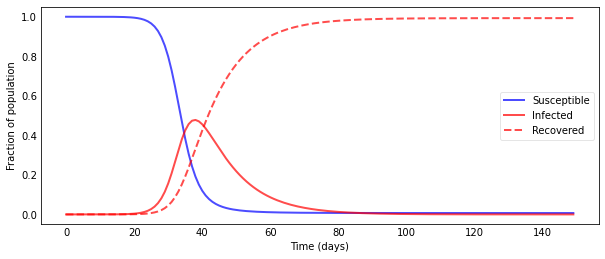

In [15]:
sim = odeint(SIR_model, y0, tvect, args=(beta, gamma))
S, I, R = sim.T

# plot results
plotSIR(tvect, S, I, R)

In [16]:
## log parameters and sat/unsat

param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': input("Please enter 0 if the parameter choices were bad and 1 if they were good:")}

param_choices_true_false.append(param_assignments)

In [17]:
print(param_assignments)

print(param_choices_true_false)

{'beta': 0.5, 'gamma': 0.1, 'assignment': '1'}
[{'beta': 0.1, 'gamma': 0.5, 'assignment': '0'}, {'beta': 0.5, 'gamma': 0.1, 'assignment': '1'}]


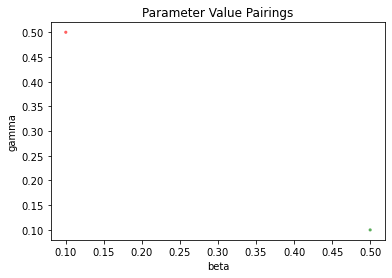

In [18]:
# Plot "true/false" points.  Is there any way of characterizing these regions?

# Fixing random state for reproducibility
np.random.seed(19680801)

xsample = [result['beta'] for result in param_choices_true_false]
ysample = [result['gamma'] for result in param_choices_true_false]
colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
plt.title("Parameter Value Pairings")
plt.xlabel("beta")
plt.ylabel("gamma")

# colors = np.random.rand(N)
area = 5  # 0 to 15 point radii

plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)
plt.show()